<a href="https://colab.research.google.com/github/soleme/web-ai-hub/blob/main/tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)
print(lemon.shape)
lemon.head()

(6, 2)


,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48


In [ ]:
독립 = lemon[['온도']]
종속 = lemon[['판매량']]

print(독립.head(2))
print(종속.head(2))

   온도
0  20
1  21
   판매량
0   40
1   42


In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.shape)
boston.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(boston.columns)
독립 = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
종속 = boston[['medv']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)
      crim    zn  indus  chas    nox  ...  rad  tax  ptratio      b  lstat
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.9   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.9   9.14

[2 rows x 13 columns]
   medv
0  24.0
1  21.6


In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv"
iris = pd.read_csv(path)
print(iris.shape)
iris.head()

(150, 5)


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 첫번째 딥러닝 - 레모네이드 판매 예측
###"https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"

In [ ]:
import tensorflow as tf
import pandas as pd
# 데이터를 준비합니다.

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)

x_lemon = lemon[['온도']]
y_lemon = lemon[['판매량']]
print(x_lemon.shape, y_lemon.shape)

(6, 1) (6, 1)


In [ ]:
# 모델을 생성합니다.
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss="mse")

In [ ]:
model.fit(x_lemon, y_lemon, epochs=1000, verbose=0)
model.fit(x_lemon, y_lemon, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4308e-04
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4256e-04
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4229e-04
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 6.4197e-04
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4160e-04
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4118e-04
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4062e-04
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 6.4008e-04
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 6.3955e-04
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 6.3899e-04


In [ ]:
# 모델을 이용합니다.
model.predict(x_lemon)

array([[40.023785],
       [42.010227],
       [43.996666],
       [45.983105],
       [47.969547],
       [49.95599 ]], dtype=float32)

In [ ]:
model.get_weights()

[array([[1.9864407]], dtype=float32), array([0.29497144], dtype=float32)]

In [ ]:
0.22441791 * 20 + 0.03882809

4.52718629

## 두번째 딥러닝 - 보스턴 집값 예측
-"https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"

In [ ]:
import pandas as pd
import tensorflow as tf

# 데이터를 준비한다
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.columns)

x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y_boston = boston[['medv']]       
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


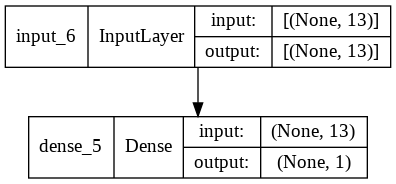

In [ ]:
# 모델을 준비한다
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse")

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 모델을 데이터로 학습시킨다
model.fit(x_boston, y_boston, epochs=1000, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 24.9535
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 24.7684
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 24.7085
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 24.8790
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 24.5154
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 24.6712
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 24.5717
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 24.7677
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 24.6122
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 24.9311


In [ ]:
# 모델을 이용한다
model.predict(x_boston[:5])

array([[30.034752],
       [24.866808],
       [31.257698],
       [30.170763],
       [29.726696]], dtype=float32)

In [ ]:
model.get_weights()

[array([[-0.08748121],
        [ 0.0540995 ],
        [-0.04336084],
        [ 2.9176128 ],
        [ 2.0115478 ],
        [ 5.023054  ],
        [-0.00601643],
        [-0.9817363 ],
        [ 0.17508905],
        [-0.00998509],
        [-0.3218031 ],
        [ 0.01461662],
        [-0.49034646]], dtype=float32), array([3.8051312], dtype=float32)]

## 세번째 딥러닝. 아이리스 품종 분류
-"https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv"

In [2]:
# 데이터를 준비합니다. 
import tensorflow as tf
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv"
iris = pd.read_csv(path)
iris = pd.get_dummies(iris)
print(iris.columns)

x_iris = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y_iris = iris[['품종_setosa', '품종_versicolor', '품종_virginica']]

print(x_iris.shape, y_iris.shape)
print(x_iris.head(1))
print(y_iris.head(1))

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')
(150, 4) (150, 3)
   꽃잎길이  꽃잎폭  꽃받침길이  꽃받침폭
0   5.1  3.5    1.4   0.2
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0


In [3]:
# 모델을 준비합니다. 
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation="softmax")(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="categorical_crossentropy", metrics="accuracy")

In [4]:
# 모델에 데이터를 학습시킵니다. 
model.fit(x_iris, y_iris, epochs=1000, verbose=0)
model.fit(x_iris, y_iris, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9800
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9800
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.9800
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9800
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9800
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9800
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9800
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9800
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9800
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9800


In [5]:
# 모델을 이용합니다. 
sample = x_iris.sample(5)
pred = model.predict(sample)

In [6]:
sample

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭
56,6.3,3.3,4.7,1.6
81,5.5,2.4,3.7,1.0
131,7.9,3.8,6.4,2.0
116,6.5,3.0,5.5,1.8
136,6.3,3.4,5.6,2.4


In [7]:
pred

array([[2.1105383e-04, 7.8550559e-01, 2.1428339e-01],
       [3.8575619e-03, 9.2986625e-01, 6.6276252e-02],
       [8.2220708e-07, 3.8503888e-01, 6.1496025e-01],
       [1.2981224e-06, 2.2849970e-01, 7.7149898e-01],
       [7.2377539e-08, 6.0801681e-02, 9.3919826e-01]], dtype=float32)

In [8]:
y_iris.loc[[68, 95, 63, 66, 25], :]

,품종_setosa,품종_versicolor,품종_virginica
68,0,1,0
95,0,1,0
63,0,1,0
66,0,1,0
25,1,0,0


In [9]:
model.get_weights()

[array([[ 1.0659637 ,  0.6163013 , -1.0201895 ],
        [ 2.8780696 ,  0.46651605, -0.93387854],
        [-3.8588495 , -0.71491396,  1.683154  ],
        [-4.447116  , -0.9085211 ,  1.6142476 ]], dtype=float32),
 array([ 2.0361872 ,  0.61090857, -1.064274  ], dtype=float32)]

### 네번째 딥러닝. 히든레이어
-https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv
-https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
-https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

In [10]:
import pandas as pd
import tensorflow as tf

boston = pd.read_csv("https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv")
print(boston.columns)
x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y_boston = boston[['medv']]
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


In [11]:
# 모델을 준비합니다. 
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5, activation='swish')(X)
H = tf.keras.layers.Dense(5, activation='swish')(H)
H = tf.keras.layers.Dense(5, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 70        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델을 데이터로 학습시킵니다. 
model.fit(x_boston, y_boston, epochs=500, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 19.9946
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 19.6398
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 18.8642
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 19.9998
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 19.2077
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 19.9108
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 19.2230
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 19.0320
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 18.6696
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 18.2494


### 아이리스 인공신경망

In [14]:
import pandas as pd
import tensorflow as tf

# 데이터를 준비합니다. 
iris = pd.read_csv("https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv")
iris = pd.get_dummies(iris)
print(iris.columns)

x_iris = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y_iris = iris[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(x_iris.shape, y_iris.shape)

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')
(150, 4) (150, 3)


In [19]:
# 모델을 생성합니다. 
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_13 (Dense)            (None, 9)                 45        
                                                                 
 dense_14 (Dense)            (None, 8)                 80        
                                                                 
 dense_15 (Dense)            (None, 7)                 63        
                                                                 
 dense_16 (Dense)            (None, 3)                 24        
                                                                 
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델을 학습합니다. 
model.fit(x_iris, y_iris, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 0.9877 - accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9262 - accuracy: 0.4933
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8379 - accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7651 - accuracy: 0.6667
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7354 - accuracy: 0.6667
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.6800
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.6867
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6933
Epoch 11/100
5/5 [===========

### 딥러닝 예제

In [35]:
import tensorflow as tf
x_train = [[0, 0],
           [0, 1],
           [1, 0],
           [1, 1]]
y_train = [[0],
           [0],
           [0],
           [1]]

In [36]:
X = tf.keras.layers.Input(shape=[2])
Y = tf.keras.layers.Dense(2, activation="sigmoid")(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="binary_crossentropy", metrics="accuracy")

In [39]:
# 데이터 준비하기
x_input = [
    [1, 2],
    [1, 5],
    [2, 2],
    [2, 9],
    [3, 1],
    [3, 7],
    [4, 3],
    [4, 8],
    [5, 8],
    [5, 3],
    [6, 5],
    [6, 9],
    [7, 3],
    [7, 1],
    [8, 5],
    [8, 8],
    [9, 4],
    [9, 3],
]
y_label = [[sum(e)] for e in x_input]
y_label

[[3],
 [6],
 [4],
 [11],
 [4],
 [10],
 [7],
 [12],
 [13],
 [8],
 [11],
 [15],
 [10],
 [8],
 [13],
 [16],
 [13],
 [12]]

In [40]:
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics="accuracy")

In [43]:
model.fit(x_input, y_label, epochs=1000, verbose=0)
model.fit(x_input, y_label, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0042 - accuracy: 0.0000

In [44]:
model.predict([[12, 11]])

array([[22.603065]], dtype=float32)